In [0]:
pip install category_encoders

     |████████████████████████████████| 102kB 2.3MB/s 


## **Import Data**

In [0]:
import pandas as pd
import numpy as np

In [0]:
df_original = pd.read_csv('output.csv')

In [0]:
df_original.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## **Data Cleaning**

In [0]:
df = df_original.drop(columns=['date', 'country', 'street', 'sqft_living'])
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.50,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.0,3.0,2.00,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.0,3.0,2.25,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.0,4.0,2.50,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052


In [0]:
#Split yr_renovated into two columns: (1)if_renovated = renovated yes/no (2)yrs_since_renovated = how many years since renovated
df['if_renovated'] = 0 #no
df.if_renovated[df.yr_renovated > 0] = 1 #yes
df['yrs_since_renovated'] = 'N/A'
df.yrs_since_renovated[df.if_renovated == 1] = 2014 - df.yr_renovated

#Add column yrs_since_built = how many years since built
df['yrs_since_built'] = 'N/A'
df.yrs_since_built = 2014 - df.yr_built
df.yrs_since_renovated[df.yrs_since_renovated == 'N/A'] = df.yrs_since_built
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,if_renovated,yrs_since_renovated,yrs_since_built
0,313000.0,3.0,1.50,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,1,9,59
1,2384000.0,5.0,2.50,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,0,93,93
2,342000.0,3.0,2.00,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,0,48,48
3,420000.0,3.0,2.25,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,0,51,51
4,550000.0,4.0,2.50,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,1,22,38


In [0]:
#Remove WA from statezip column
df.statezip = df.statezip.str.strip('WA')
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,if_renovated,yrs_since_renovated,yrs_since_built
0,313000.0,3.0,1.50,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,98133,1,9,59
1,2384000.0,5.0,2.50,9050,2.0,0,4,5,3370,280,1921,0,Seattle,98119,0,93,93
2,342000.0,3.0,2.00,11947,1.0,0,0,4,1930,0,1966,0,Kent,98042,0,48,48
3,420000.0,3.0,2.25,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,98008,0,51,51
4,550000.0,4.0,2.50,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,98052,1,22,38


In [0]:
#Check if renovation year is after built year
df.yr_renovated[df.yr_built > df.yr_renovated] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,if_renovated,yrs_since_renovated,yrs_since_built
0,3.130000e+05,3.0,1.50,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,98133,1,9,59
1,2.384000e+06,5.0,2.50,9050,2.0,0,4,5,3370,280,1921,0,Seattle,98119,0,93,93
2,3.420000e+05,3.0,2.00,11947,1.0,0,0,4,1930,0,1966,0,Kent,98042,0,48,48
3,4.200000e+05,3.0,2.25,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,98008,0,51,51
4,5.500000e+05,4.0,2.50,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,98052,1,22,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,98133,1,35,60
4596,5.343333e+05,3.0,2.50,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,98007,1,5,31
4597,4.169042e+05,3.0,2.50,7014,2.0,0,0,3,3010,0,2009,0,Renton,98059,0,5,5
4598,2.034000e+05,4.0,2.00,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,98178,0,40,40


In [0]:
#Export to Excel
df.to_excel('dataframe.xlsx', index = False)

## **Data Understanding**

In [0]:
#Count NaN values in df
print(df.isna().sum())
df.describe()

price                  0
bedrooms               0
bathrooms              0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
sqft_above             0
sqft_basement          0
yr_built               0
yr_renovated           0
city                   0
statezip               0
if_renovated           0
yrs_since_renovated    0
yrs_since_built        0
dtype: int64


,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,if_renovated,yrs_since_built
count,4.600000e+03,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,725.466522,0.405435,43.213696
std,5.638347e+05,0.908848,0.783781,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,961.069499,0.491029,29.731848
min,0.000000e+00,0.000000,0.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,0.000000,17.000000
50%,4.609435e+05,3.000000,2.250000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,0.000000,38.000000
75%,6.549625e+05,4.000000,2.500000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1997.000000,1.000000,63.000000
max,2.659000e+07,9.000000,8.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,1.000000,114.000000


In [0]:
#Removing Outliars
indexNames = df[df.price > 10000000].index
df = df.drop(indexNames)

In [0]:
#Count houses with price = 0
print(len(df[df.price == 0]))
df[df.price == 0].head()

49


,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,if_renovated,yrs_since_renovated,yrs_since_built
4354,0.0,3.0,1.75,10125,1.0,0,0,4,1490,0,1962,0,Federal Way,98001,0,52,52
4356,0.0,4.0,2.75,5390,1.0,0,0,4,1300,1300,1960,2001,Seattle,98199,1,13,54
4357,0.0,6.0,2.75,9200,1.0,0,2,4,1600,1600,1953,1983,Burien,98146,1,31,61
4358,0.0,5.0,3.50,36615,2.0,0,0,4,2490,990,1983,0,Issaquah,98075,0,31,31
4361,0.0,5.0,1.50,7112,1.0,0,0,5,760,740,1920,0,Burien,98166,0,94,94


In [0]:
#Count houses with bathroom = 0 or bedroom = 0
#print(len(df[(df.bathrooms == 0) or (df.bedrooms == 0)]))
df[(df.bathrooms == 0) | (df.bedrooms == 0)]

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,if_renovated,yrs_since_renovated,yrs_since_built
2365,1095000.0,0.0,0.0,4764,3.5,0,2,3,3064,0,1990,2009,Seattle,98102,1,5,24
3209,1295648.0,0.0,0.0,28008,2.0,0,0,3,4810,0,1990,2009,Redmond,98053,1,5,24


In [0]:
#Fill missing values in bedrooms and bathrooms columns with average for houses worh over 1M
df[df.price > 1000000].describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,if_renovated,yrs_since_built
count,3.400000e+02,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,1.603041e+06,4.073529,3.142647,21680.829412,1.802941,0.044118,1.150000,3.544118,3088.576471,701.588235,1971.644118,646.282353,0.367647,42.355882
std,1.611729e+06,0.961135,0.968846,38972.630845,0.468151,0.205659,1.486766,0.757145,1187.499061,737.267422,33.428299,935.934201,0.482875,33.428299
min,1.003000e+06,0.000000,0.000000,1664.000000,1.000000,0.000000,0.000000,2.000000,1050.000000,0.000000,1900.000000,0.000000,0.000000,0.000000
25%,1.134000e+06,4.000000,2.500000,6541.500000,1.500000,0.000000,0.000000,3.000000,2200.000000,0.000000,1948.000000,0.000000,0.000000,13.000000
50%,1.300000e+06,4.000000,3.250000,10487.000000,2.000000,0.000000,0.000000,3.000000,2885.000000,670.000000,1982.000000,0.000000,0.000000,32.000000
75%,1.680250e+06,5.000000,3.500000,17858.500000,2.000000,0.000000,3.000000,4.000000,3882.500000,1160.000000,2001.000000,1991.250000,1.000000,66.000000
max,2.659000e+07,8.000000,8.000000,307752.000000,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,1.000000,114.000000


In [0]:
#Missing values for bedrooms, bathrooms
df.bedrooms[df.bedrooms == 0] = int(np.mean(df.bedrooms[df.price > 1000000]))
df.bathrooms[df.bathrooms == 0] = int(np.mean(df.bathrooms[df.price > 1000000]))
df.loc[2365:2365]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,if_renovated,yrs_since_renovated,yrs_since_built
2365,1095000.0,4.0,3.0,4764,3.5,0,2,3,3064,0,1990,2009,Seattle,98102,1,5,24


In [0]:
df.price[df.price < 50000] = int(np.mean(df.price[df.price > 50000]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df = df.drop(columns=['yr_built', 'yr_renovated'])
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,if_renovated,yrs_since_renovated,yrs_since_built
0,313000.0,3.0,1.50,7912,1.5,0,0,3,1340,0,Shoreline,98133,1,9,59
1,2384000.0,5.0,2.50,9050,2.0,0,4,5,3370,280,Seattle,98119,0,93,93
2,342000.0,3.0,2.00,11947,1.0,0,0,4,1930,0,Kent,98042,0,48,48
3,420000.0,3.0,2.25,8030,1.0,0,0,4,1000,1000,Bellevue,98008,0,51,51
4,550000.0,4.0,2.50,10500,1.0,0,0,4,1140,800,Redmond,98052,1,22,38


In [0]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df)
#print(df.statezip.value_counts())

 98103    148
 98052    135
 98117    132
 98115    130
 98006    110
         ... 
 98047      6
 98288      3
 98354      2
 98050      2
 98068      1
Name: statezip, Length: 77, dtype: int64


## **Test/Train Split**

In [0]:
# Train/Test Split
from sklearn.model_selection import StratifiedShuffleSplit
#y = df.price


#sss = StratifiedShuffleSplit(test_size = 0.2, random_state = 42)
# sss.split(df.iloc[:, 1:], df.price)
#for train_index, test_index in sss.split(df.iloc[:, 1:], df.price):
#  print("TRAIN:", train_index, "TEST:", test_index)
#  X_train, X_test = df.iloc[train_index, 1:], df[test_index, 1:]
#  y_train, y_test = df.iloc[train_index, 0], df.iloc[test_index, 0]
#X_target_train, X_target_test, y_target_train, y_target_test = X_train, X_test, y_hot_train, y_hot_test

#X_train


# split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, train_size=0.8, random_state=42)
# print(split)
# split.get_n_splits(df.iloc[:, 1:].to_numpy(), df.price.to_numpy())
# df_temp_X = df.iloc[:, 1:]
# df_temp_Y = df.price

# for train_index, test_index in split.split(df_temp_X,df_temp_Y ):
#     #print("TRAIN:", train_index, "TEST:", test_index)
#     train_set_x = df_temp_X.loc[train_index]
#     train_set_y = df_temp_Y.loc[train_index]
#     test_set_x  = df_temp_X.loc[test_index]
#     test_set_y  = df_temp_Y.loc[test_index]




In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.price, test_size = 0.2, random_state = 42)
X_train

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,if_renovated,yrs_since_renovated,yrs_since_built
2792,3.0,2.00,7700,1.0,0,0,3,1170,500,Kirkland,98034,1,12,42
3604,3.0,3.00,4440,1.0,0,0,3,1670,0,Enumclaw,98022,0,0,0
643,5.0,2.00,7314,1.0,0,0,3,1000,700,Seattle,98108,1,13,58
1270,3.0,1.00,11244,1.0,0,0,4,1010,0,Shoreline,98155,1,26,67
2155,2.0,1.75,158558,1.5,0,0,2,1610,0,Snoqualmie,98065,0,66,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4428,4.0,3.00,18000,2.0,0,2,3,4260,0,Mercer Island,98040,0,14,14
466,4.0,2.00,6000,1.0,0,0,3,1400,1120,Seattle,98103,1,7,93
3092,3.0,1.00,8145,1.0,0,0,4,990,160,Shoreline,98155,1,56,82
3772,2.0,1.00,2002,1.5,0,0,3,910,0,Seattle,98112,1,9,114


## **Encoding Variables**

In [0]:
#Hot Encoder
#print("hello")
# def Hot_Encoder(df):
#   zip_dums= pd.get_dummies(df['statezip'])
#   encoded_df = pd.concat([df,zip_dums], axis=1)
#   zip_dums2= pd.get_dummies(df['city'])
#   encoded_df = pd.concat([encoded_df,zip_dums2], axis=1)
#   return encoded_df

In [0]:
# X_hot_train = Hot_Encoder(X_train)
# X_hot_test = Hot_Encoder(X_test)

In [0]:
#Target Encoder
from category_encoders import TargetEncoder

def Target_Encoder(df, y):
  te_city = TargetEncoder()
  encoded_df = pd.merge(df, y, left_index = True, right_index = True)
  print(encoded_df)
  encoded_df['city_encoded'] = te_city.fit_transform(encoded_df['city'], encoded_df['price'])

  te_zip = TargetEncoder()
  encoded_df['statezip_encoded'] = te_zip.fit_transform(encoded_df['statezip'], encoded_df['price'])
  encoded_df = encoded_df.drop(columns=['price'])

  return encoded_df

#https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64 

In [0]:
X_target_train = Target_Encoder(X_train, y_train)
X_target_test = Target_Encoder(X_test, y_test)

      bedrooms  bathrooms  ...  yrs_since_built     price
2792       3.0       2.00  ...               42  424000.0
3604       3.0       3.00  ...                0  246950.0
643        5.0       2.00  ...               58  337500.0
1270       3.0       1.00  ...               67  350000.0
2155       2.0       1.75  ...               66  280000.0
...        ...        ...  ...              ...       ...
4428       4.0       3.00  ...               14  435000.0
466        4.0       2.00  ...               93  875000.0
3092       3.0       1.00  ...               82  290000.0
3772       2.0       1.00  ...              114  600000.0
860        2.0       1.00  ...               85  475000.0

[3678 rows x 15 columns]
      bedrooms  bathrooms  ...  yrs_since_built     price
4250       4.0       2.50  ...               26  486000.0
2576       6.0       1.75  ...              114  660000.0
2111       4.0       2.50  ...               11  307550.0
296        3.0       2.00  ...               2

## **Data Standardization**

In [0]:
#Implement the Standarizaion function that takes in the dataframe to standarize and its column names
from sklearn import preprocessing

def Standarization (df, test, col):
  #Drop the unnecessary columns and swap the column locations of 'if_renovated'  and 'yrs_since_built' to separate encoders and non-encoder values
  df = df.drop(columns=['city',	'statezip'])
  df.insert(12, 'renovated', df.if_renovated, True)
  df = df.drop(df.columns[[9]], axis = 1)
  #Save index and add to df as a unique-id when we concatenate later
  print(df.iloc[:, 8:13])
  index = [i for i in df.index] 

  X_unscaled = df.iloc[:,:11]
  scaler = preprocessing.StandardScaler()
  X_scaled = scaler.fit_transform(X_unscaled)
  standarized_df = pd.DataFrame(X_scaled)
  standarized_df['index'] = index

  df_temp = df.iloc[:,11:]
  temp = pd.DataFrame(df_temp)
  temp['index'] = index

  standarized_df.columns = ['bedrooms', 'bathrooms', 'sqft_lot',
  'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yrs_since_renovated', 'yrs_since_built', 'index']
  standarized_df = pd.merge(standarized_df, temp, on = 'index')
  Xtrain_class = standarized_df
  standarized_df = standarized_df.drop(columns=['index'])

  test = test.drop(columns=['city',	'statezip'])
  test.insert(12, 'renovated', test.if_renovated, True)
  test = test.drop(test.columns[[9]], axis = 1)
  #Save index and add to df as a unique-id when we concatenate later
  print(test.iloc[:, 8:13])
  index = [i for i in test.index]

  X_unscaled = test.iloc[:,:11]
  X_scaled = scaler.transform(X_unscaled)
  standarized_test_df = pd.DataFrame(X_scaled)
  standarized_test_df['index'] = index

  df_temp = test.iloc[:,11:]
  temp = pd.DataFrame(df_temp)
  temp['index'] = index

  standarized_test_df.columns = ['bedrooms', 'bathrooms', 'sqft_lot',
  'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yrs_since_renovated', 'yrs_since_built', 'index']
  standarized_test_df = pd.merge(standarized_test_df, temp, on = 'index')
  Xtest_class = standarized_test_df
  standarized_test_df = standarized_test_df.drop(columns=['index'])  

  return standarized_df, standarized_test_df, Xtrain_class, Xtest_class

In [0]:
#Standarize hot encoded X_train and X_test
# col_hot = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yrs_since_renovated', 'yrs_since_built', 'if_renovated', ' 98001', ' 98002', ' 98003', ' 98004', ' 98005', ' 98006', ' 98007', ' 98008', ' 98010', ' 98011', ' 98014', ' 98019', ' 98022', ' 98023', ' 98024', ' 98027', ' 98028', ' 98029', ' 98030', ' 98031', ' 98032', ' 98033', ' 98034', ' 98038', ' 98039', ' 98040', ' 98042', ' 98045', ' 98047', ' 98051', ' 98052', ' 98053', ' 98055', ' 98056', ' 98057', ' 98058', ' 98059', ' 98065', ' 98070', ' 98072', ' 98074', ' 98075', ' 98077', ' 98092', ' 98102', ' 98103', ' 98105', ' 98106', ' 98107', ' 98108', ' 98109', ' 98112', ' 98115', ' 98116', ' 98117', ' 98118', ' 98119', ' 98122', ' 98125', ' 98126', ' 98133', ' 98136', ' 98144', ' 98146', ' 98148', ' 98155', ' 98166', ' 98168', ' 98177', ' 98178', ' 98188', ' 98198', ' 98199', 'Algona', 'Auburn', 'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw', 'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley', 'Medina', 'Mercer Island', 'Newcastle', 'Normandy Park', 'North Bend', 'Pacific', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline', 'Snoqualmie', 'Tukwila', 'Vashon', 'Woodinville', 'Yarrow Point']
# Xtrain_hot_Standardization = Standarization(X_hot_train, col_hot)
# Xtest_hot_Standardization = Standarization(X_hot_test, col_hot)

#Standarize target encoded X_train and X_test
col_target = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yrs_since_renovated', 'yrs_since_built', 'if_renovated', 'city_encoded', 'statezip_encoded']
Xtrain_target_Standardization, Xtest_target_Standardization, Xtrain_class, Xtest_class = Standarization(X_target_train, X_target_test, col_target)

      sqft_basement yrs_since_renovated  ...  renovated  city_encoded
2792            500                  12  ...          1  6.664003e+05
3604              0                   0  ...          0  3.373363e+05
643             700                  13  ...          1  5.768128e+05
1270              0                  26  ...          1  4.230690e+05
2155              0                  66  ...          0  5.561893e+05
...             ...                 ...  ...        ...           ...
4428              0                  14  ...          0  1.120110e+06
466            1120                   7  ...          1  5.768128e+05
3092            160                  56  ...          1  4.230690e+05
3772              0                   9  ...          1  5.768128e+05
860             630                  85  ...          0  5.768128e+05

[3678 rows x 5 columns]
      sqft_basement yrs_since_renovated  ...  renovated   city_encoded
4250              0                  14  ...          1  325321.

In [0]:
sns.set(style="ticks")

sns.pairplot(Xtrain_target_Standarization)

## **Linear Regression**

In [0]:
# print(len(Xtrain_hot_Standardization.columns))

In [0]:
# set(list(Xtrain_hot_Standardization.columns)) ^ set(list(Xtest_hot_Standardization.columns))

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# #Create Linest Regression Modeal using hot-encoded data
# reg = LinearRegression()
# reg.fit(Xtrain_hot_Standardization, y_hot_train)
# print(len(Xtrain_hot_Standardization))
# print(len(Xtest_hot_Standardization))
# y_pred_train = reg.predict(Xtrain_hot_Standardization)
# y_pred_test = reg.predict(Xtest_hot_Standardization)

# #Calculate the accuracy of the model
# print("r2_score on training data", r2_score(y_hot_train, y_pred_train))
# print("r2_score on testing data", r2_score(y_hot_test, y_pred_test))

# plt.scatter(y_hot_test, y_pred_test)
# plt.xlabel('y_hot_test')
# plt.ylabel('y_pred_test')

r2_score on training data 0.7243244269486078
r2_score on testing data 0.7131088159914838
MSE: 38358377573.4001
MSE: 36977120648.9611


Text(0, 0.5, 'y_pred_test')

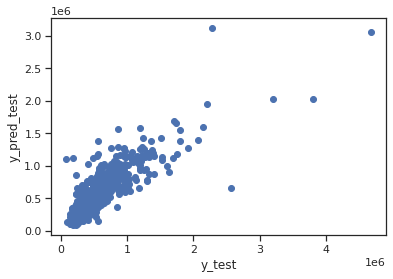

In [0]:
#Create Linest Regression Modeal using target-encoded data
reg = LinearRegression()
reg.fit(Xtrain_target_Standardization, y_train)
y_pred_train = reg.predict(Xtrain_target_Standardization)
y_pred_test = reg.predict(Xtest_target_Standardization)

#Calculate the accuracy of the model
print("r2_score on training data", r2_score(y_train, y_pred_train))
print("r2_score on testing data", r2_score(y_test, y_pred_test))

#TEJAS TEST
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_test)
print("MSE: %.4f" % mse)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE: %.4f" % mse)
#TEJAS TEST END

plt.scatter(y_test, y_pred_test)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')

In [0]:
#This part of the code explores 3 models(Linear Regression, Laggos, Elastic) and used cross validation and grid search.
#I varied the number of splits [3-10] but at best we get r2 of 0.11 at best.

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

model_options = [Lasso()]    #[ElasticNet(random_state=0),Lasso(),LinearRegression()]
crossfold = [5]        #[insert any range of cross fold you want to cycle through here.]
para={}

for model in model_options:
    for i in crossfold:    
    
        model = GridSearchCV(model, para, cv=KFold(n_splits=i,random_state=42))
        model.fit(Xtrain_target_Standardization, y_train)

        #predictions on train data
        y_pred_train=model.predict(Xtrain_target_Standardization)

        #predictions on test data
        y_pred_test=model.predict(Xtest_target_Standardization)

        #Print and Calculate the accuracy of the model
        print("r2_score on train data", r2_score(y_train, y_pred_train))
        print("r2_score on testing data", r2_score(y_test, y_pred_test))

r2_score on train data 0.7243244267689557
r2_score on testing data 0.7131083984983935


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
from sklearn import ensemble

# Fit GradientBoosting regression model
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls', 'random_state': 42}
clf = ensemble.GradientBoostingRegressor(**params)
model2 = clf.fit(Xtrain_target_Standardization,y_train)

#predictions on train data
clf_pred_train=model2.predict(Xtrain_target_Standardization)

#predictions on test data
clf_pred_test=model2.predict(Xtest_target_Standardization)

#Print and Calculate the accuracy of the model
print("r2_score on training data", r2_score(y_train, clf_pred_train))
print("r2_score on testing data", r2_score(y_test, clf_pred_test))

r2_score on training data 0.9147627490470743
r2_score on testing data 0.7438794688472001


In [0]:
from sklearn import ensemble

# Fit GradientBoosting regression model
# We were not able to save the output of this section please see the report figures.
crossfold = [5] 

params = {'n_estimators': [100,1000], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_split': [2, 4, 6, 10],
          'learning_rate': [0.01,.05], 'loss': ['ls', 'lad', 'huber'], 'max_features' : ['auto', 'sqrt', 'log2']}

clf = GridSearchCV(ensemble.GradientBoostingRegressor(random_state = 42), params, cv=5, n_jobs=-1,verbose = 1)
model2 = clf.fit(Xtrain_target_Standardization,y_train)

#predictions on train data
clf_pred_train=model2.predict(Xtrain_target_Standardization)

#predictions on test data
clf_pred_test=model2.predict(Xtest_target_Standardization)

#Print and Calculate the accuracy of the model
print("r2_score on training data", r2_score(y_train, clf_pred_train))
print("r2_score on testing data", r2_score(y_test, clf_pred_test))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.4s


KeyboardInterrupt: ignored

In [0]:
model2 = clf.fit(Xtrain_target_Standardization,y_train)

NameError: ignored

In [0]:
# We were not able to save the output of this section please see the report figures.
# Fit RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor

# Instantiate model
rf = RandomForestRegressor(n_estimators = 1000, max_depth = 8,max_features=4, random_state = 42)
# Training the model
rf.fit(Xtrain_target_Standardization,y_train)

#predictions on train data
rf_pred_train=rf.predict(Xtrain_target_Standardization)

#predictions on test data
rf_pred_test=rf.predict(Xtest_target_Standardization)

#Print and Calculate the accuracy of the model
print("r2_score on training data", r2_score(y_train, rf_pred_train))
print("r2_score on testing data", r2_score(y_test, rf_pred_test))

r2_score on training data 0.8803921199546288
r2_score on testing data 0.7468465132963055


In [0]:
#Tuning a RandomForestRegressor
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [4, 5],
    'min_samples_split': [8, 12],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# Create a based model
rf = RandomForestRegressor()
    
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv =5, n_jobs = -1, verbose = 2)
    
# Fit the grid search to the data
grid_search.fit(Xtrain_target_Standardization,y_train)
grid_search.best_params_

#Performance of the tuned RandomForestRegressor model

#predictions on train data
rf_pred_train=grid_search.predict(Xtrain_target_Standardization)

#predictions on test data
rf_pred_test=grid_search.predict(Xtest_target_Standardization)

#Print and Calculate the accuracy of the model
print("r2_score on training data", r2_score(y_train, rf_pred_train))
print("r2_score on testing data", r2_score(y_test, rf_pred_test))

In [0]:
Xtest_target_Standardization.describe()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yrs_since_renovated,yrs_since_built,renovated,city_encoded,statezip_encoded
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,9.200000e+02,9.200000e+02
mean,0.032417,0.027781,0.078592,0.011925,-0.009597,-0.023504,-0.001167,0.034816,-0.002485,-0.017405,-0.069267,0.410870,5.535571e+05,5.568966e+05
std,1.041425,1.036823,1.235081,1.030265,0.943455,0.988733,1.009221,1.013684,1.092626,1.011090,0.974456,0.492259,1.873696e+05,2.356091e+05
min,-2.667196,-1.811841,-0.400844,-0.955130,-0.085996,-0.313258,-3.626794,-1.629916,-0.685706,-1.083838,-1.460373,0.000000,2.786143e+05,2.272905e+05
25%,-0.441709,-0.524805,-0.272197,-0.955130,-0.085996,-0.313258,-0.668411,-0.722777,-0.685706,-0.748120,-0.924815,0.000000,3.618933e+05,3.650246e+05
50%,-0.441709,0.118713,-0.186608,-0.020581,-0.085996,-0.313258,-0.668411,-0.187797,-0.685706,-0.412401,-0.255366,0.000000,5.739852e+05,5.334421e+05
75%,0.671035,0.440472,-0.088874,0.913968,-0.085996,-0.313258,0.810780,0.637932,0.631674,0.342965,0.614917,1.000000,6.251164e+05,6.601154e+05
max,4.009265,7.519169,18.368452,2.783066,11.628509,4.813155,2.289971,8.825447,9.897244,3.168594,2.355483,1.000000,1.226401e+06,1.259012e+06


In [0]:
Xtrain_target_Standardization.describe()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yrs_since_renovated,yrs_since_built,renovated,city_encoded,statezip_encoded
count,3.678000e+03,3.678000e+03,3.678000e+03,3.678000e+03,3.678000e+03,3.678000e+03,3.678000e+03,3.678000e+03,3.678000e+03,3.678000e+03,3.678000e+03,3678.000000,3.678000e+03,3.678000e+03
mean,2.373788e-16,-2.707036e-16,8.436850e-17,-3.299578e-16,-2.949954e-16,-3.238301e-16,4.099192e-17,1.231569e-17,-2.462836e-16,-3.912042e-17,1.020874e-16,0.404024,5.480578e+05,5.482393e+05
std,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,0.490769,1.923155e+05,2.380457e+05
min,-2.667196e+00,-1.811841e+00,-3.989097e-01,-9.551305e-01,-8.599555e-02,-3.132575e-01,-3.626794e+00,-1.688066e+00,-6.857060e-01,-1.083838e+00,-1.460373e+00,0.000000,2.315978e+05,2.315978e+05
25%,-4.417089e-01,-5.248048e-01,-2.730319e-01,-9.551305e-01,-8.599555e-02,-3.132575e-01,-6.684110e-01,-7.344068e-01,-6.857060e-01,-7.481198e-01,-8.913422e-01,0.000000,3.858931e+05,3.651487e+05
50%,-4.417089e-01,1.187131e-01,-1.957354e-01,-2.058142e-02,-8.599555e-02,-3.132575e-01,-6.684110e-01,-2.808371e-01,-6.857060e-01,-3.377974e-01,-1.549488e-01,0.000000,5.768128e+05,5.561893e+05
75%,6.710345e-01,4.404721e-01,-9.971555e-02,9.139676e-01,-8.599555e-02,-3.132575e-01,8.107802e-01,5.448924e-01,6.536300e-01,4.455453e-01,6.818619e-01,1.000000,5.907798e+05,6.354408e+05
max,6.234752e+00,5.588616e+00,3.105629e+01,3.717615e+00,1.162851e+01,4.813155e+00,2.289971e+00,7.208878e+00,5.571847e+00,3.168594e+00,2.355483e+00,1.000000,2.372605e+06,2.372605e+06


In [0]:
plt.figure(figsize=(10, 50))
plt.scatter(y_train, Xtrain_target_Standardization['statezip_encoded'])
plt.scatter(y_test, Xtest_target_Standardization['statezip_encoded'])
plt.show()
plt.xlabel('statezip')
plt.ylabel('price')

NameError: ignored

Text(0, 0.5, 'price')

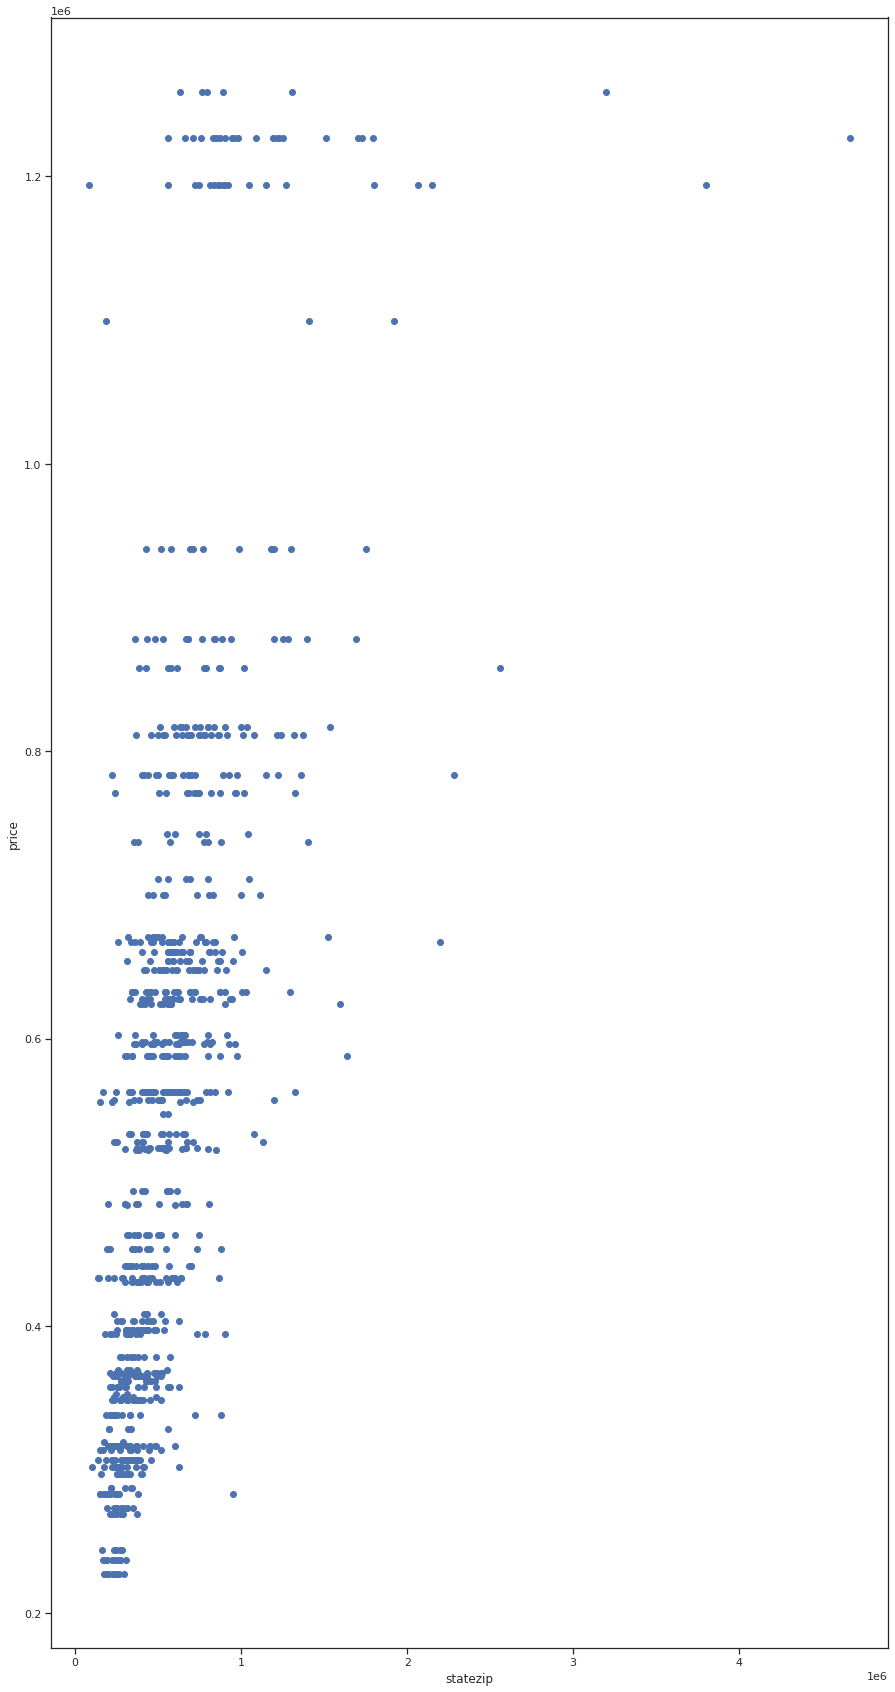

In [0]:
plt.figure(figsize=(15, 30))
plt.scatter(y_test, Xtest_target_Standardization['statezip_encoded'])
plt.xlabel('statezip')
plt.ylabel('price')

## **Classification**

In [0]:
#set up data for classifications
Xtrain_class = pd.merge(Xtrain_class, y_train, left_on = "index", right_index = True)
ytrain_class = X_train.statezip
Xtrain_class = Xtrain_class.drop(columns=['index','statezip_encoded', 'city_encoded'])

Xtest_class = pd.merge(Xtest_class, y_test, left_on = "index", right_index = True)
ytest_class = X_test.statezip
Xtest_class = Xtest_class.drop(columns=['index','statezip_encoded', 'city_encoded'])

In [0]:
# KNN Classification Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


KNN = KNeighborsClassifier()

parameters = {'weights':['uniform', 'distance'], 'n_neighbors': list(range(1,50))}

cross_val = KFold(n_splits = 10)

rand_search = GridSearchCV(KNN, parameters, cv = cross_val, scoring = 'accuracy')

rand_search.fit(Xtrain_class, ytrain_class)

ypred_class = rand_search.predict(Xtest_class)

score = accuracy_score(ypred_class, ytest_class)

print(rand_search.best_params_)

print(score)

{'n_neighbors': 6, 'weights': 'distance'}
0.057608695652173914


In [0]:
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_features=4, max_depth=5, random_state=42)
gb_clf.fit(Xtrain_class, ytrain_class)
gb_clf.score(Xtrain_class, ytrain_class)

print("Learning rate: ")
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(Xtrain_class, ytrain_class)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(Xtest_class, ytest_class)))

Learning rate: 
Accuracy score (training): 1.000
Accuracy score (validation): 0.204


In [0]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1)

clf.fit(Xtrain_class, ytrain_class)
print(clf.score((Xtrain_class, ytrain_class))
print(clf.best_params_)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state = 42)
params = {'max_depth': list(np.arange(10, 50)),
          'max_features': list(np.arange(1, Xtrain_class.shape[1])),
          'min_samples_split': list(np.arange(0.0001, 1, 0.1)),
          'min_samples_leaf': list(np.arange(0.001, 0.5, 0.1)),
          'n_estimators': list(np.arange(10, 200))}

gs = RandomizedSearchCV(rfc, params, n_iter = 100, cv = 5, random_state=42, verbose=1)
gs.fit(Xtrain_class, ytrain_class)
optimized = gs.best_estimator_
print(optimized.score(Xtest_class,ytest_class))
print(optimized)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.5min finished


0.21739130434782608
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=34, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.001, min_samples_split=0.0001,
                       min_weight_fraction_leaf=0.0, n_estimators=193,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
